# Goals ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Homework kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

# Name: Fariz Rizky Haykal Abdillah

#### Import Library

In [2140]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
pd.set_option('display.max_columns', 100)
%matplotlib inline

#### Import dataset

In [2141]:
# import dataset
# Replace '?' value in dataset as nan value or missing values
df = pd.read_csv('Automobile_data.csv',na_values=['?'])

**quick look**

In [2142]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2143]:
print("There are",df.shape[0],"observations, and",df.shape[1],"features")

There are 205 observations, and 26 features


In [2144]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 1. Exploratory Data Analysis (EDA)

## 1.1 Cleansing Data

### 1.1.1 Check for Duplicates Data

In [2145]:
# Check Duplicate data
print("Is there any duplicate?",df.duplicated().any())
print("How many duplicate?",df.duplicated().sum())

Is there any duplicate? False
How many duplicate? 0


### 1.1.2 Check Distribution of Numerical Features

In [2146]:
# Select only numerical features
numerical = df.select_dtypes(include='number')

In [2147]:
numerical.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

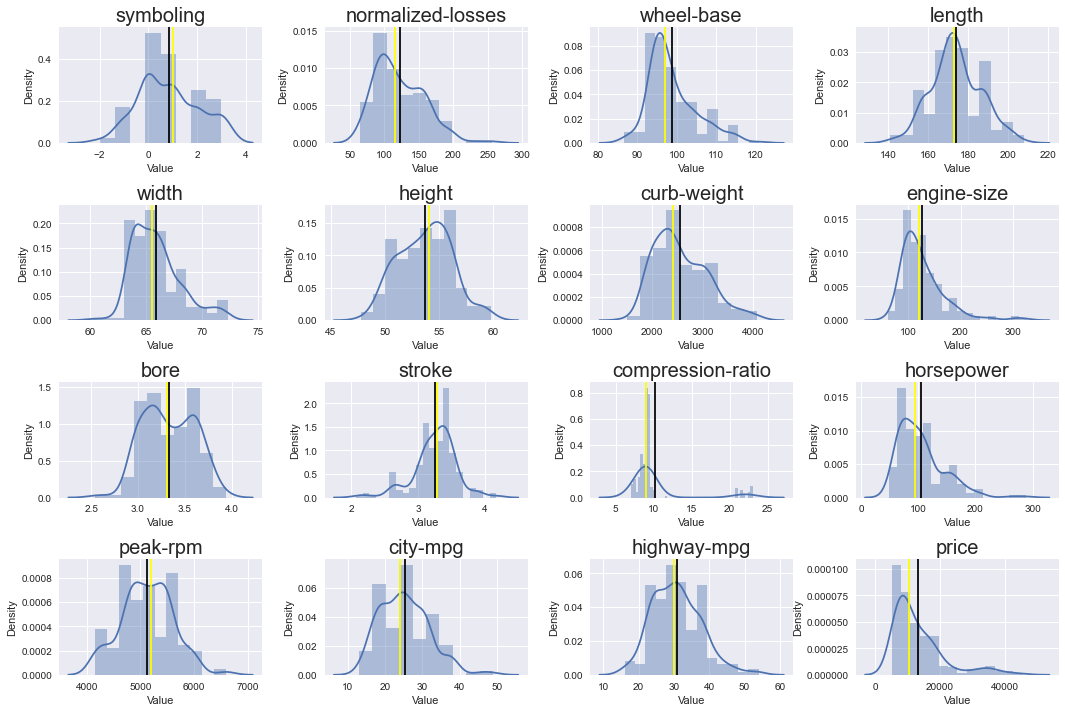

In [2148]:
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.distplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.axvline(numerical[x].median(),color='yellow')
    plt.axvline(numerical[x].mean(),color='black')
plt.show()

* #### From the graph above using a distribution plot, we can see the distribution of each feature. Some of the data is skewed left or right so it will be our consideration how to handle missing values for each feature.

### 1.1.3 Check Outliers of Numerical Features

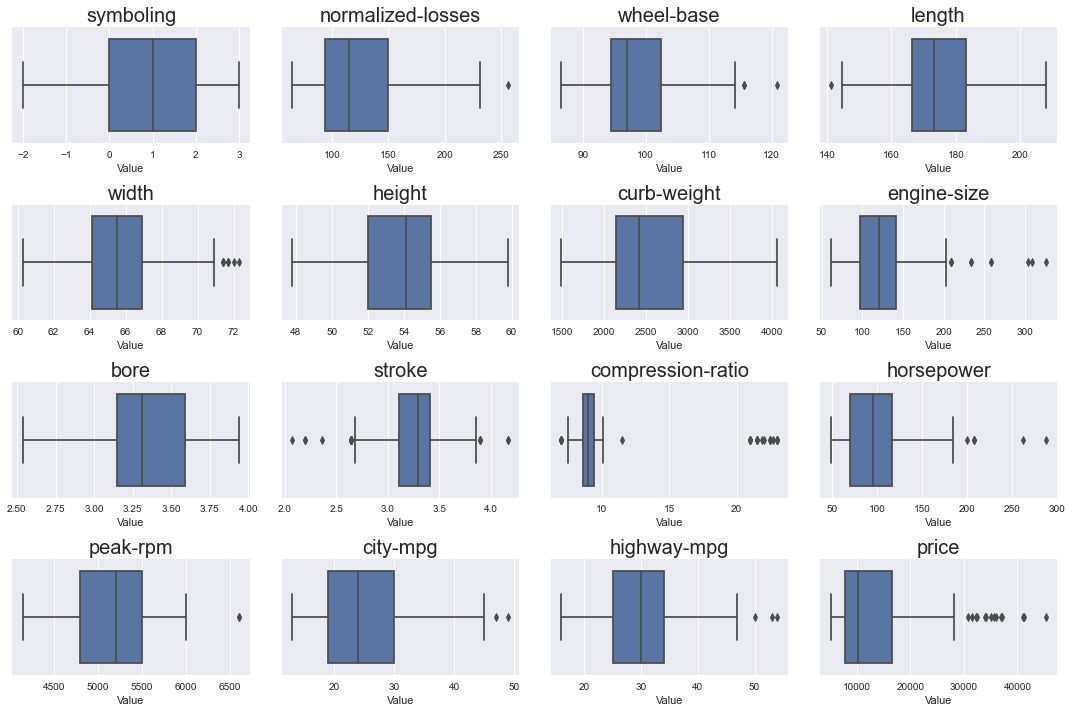

In [2149]:
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.boxplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
plt.show()

* #### Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out.

### 1.1.4 Check Missing Values and Data Type

In [2150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [2151]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [2152]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
1,normalized-losses,41,20.00000
5,num-of-doors,2,0.97561
18,bore,4,1.95122
19,stroke,4,1.95122
21,horsepower,2,0.97561
22,peak-rpm,2,0.97561
25,price,4,1.95122


### 1.1.5 Impute Missing Values

- #### Impute Missing Values in Numerical Features

In [2153]:
# Since missing value in price is not many, it is ok to delete rows where price has missing value.
df = df[df['price'].notna()]

In [2154]:
# We will use median since bore, stroke, peak-rpm have few unique values and skewed
df['bore'] = df['bore'].fillna(df['bore'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median())

In [2155]:
# We will use mean as the data in these columns are continuous
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

- ####  Impute Missing Values in Categorical Features
#### For missing values in categorical feature, we can impute missing values  with mode (most frequent value).

In [2156]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

### 1.2 Make Some Visualization

### 1.2.1 Distribution of Features

* #### Numerical Features (After impute missing values)

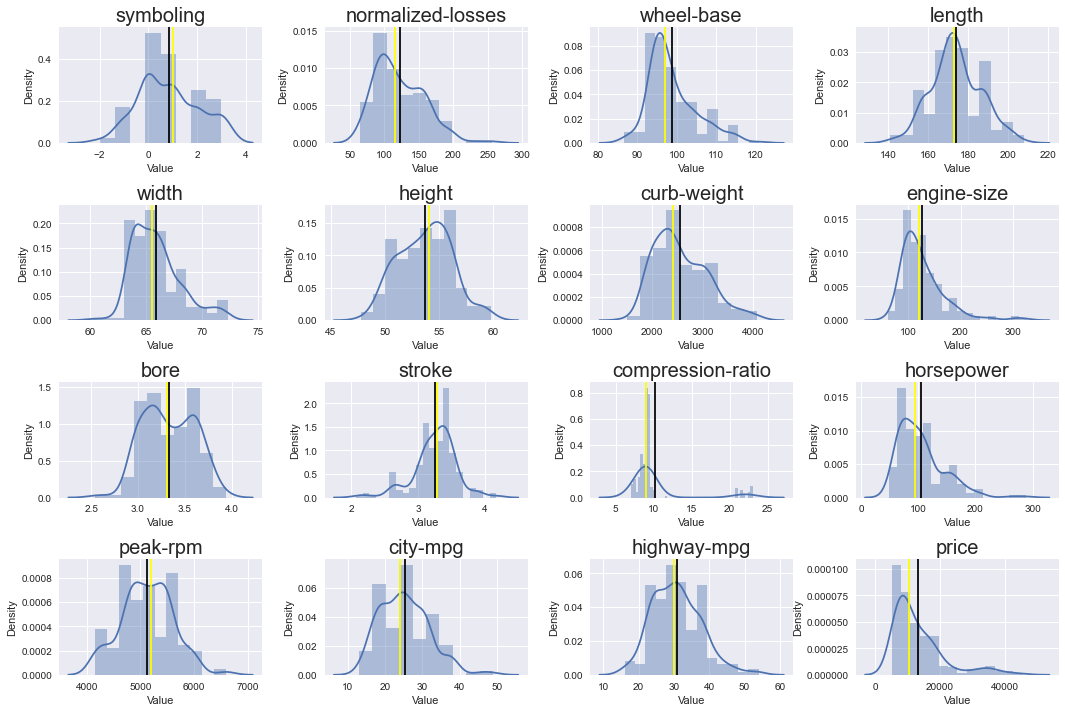

In [2157]:
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.distplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.axvline(numerical[x].median(),color='yellow')
    plt.axvline(numerical[x].mean(),color='black')
plt.show()

* #### Categorical Features

In [2158]:
categorical = df.select_dtypes(include=['object'])

In [2159]:
categorical.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

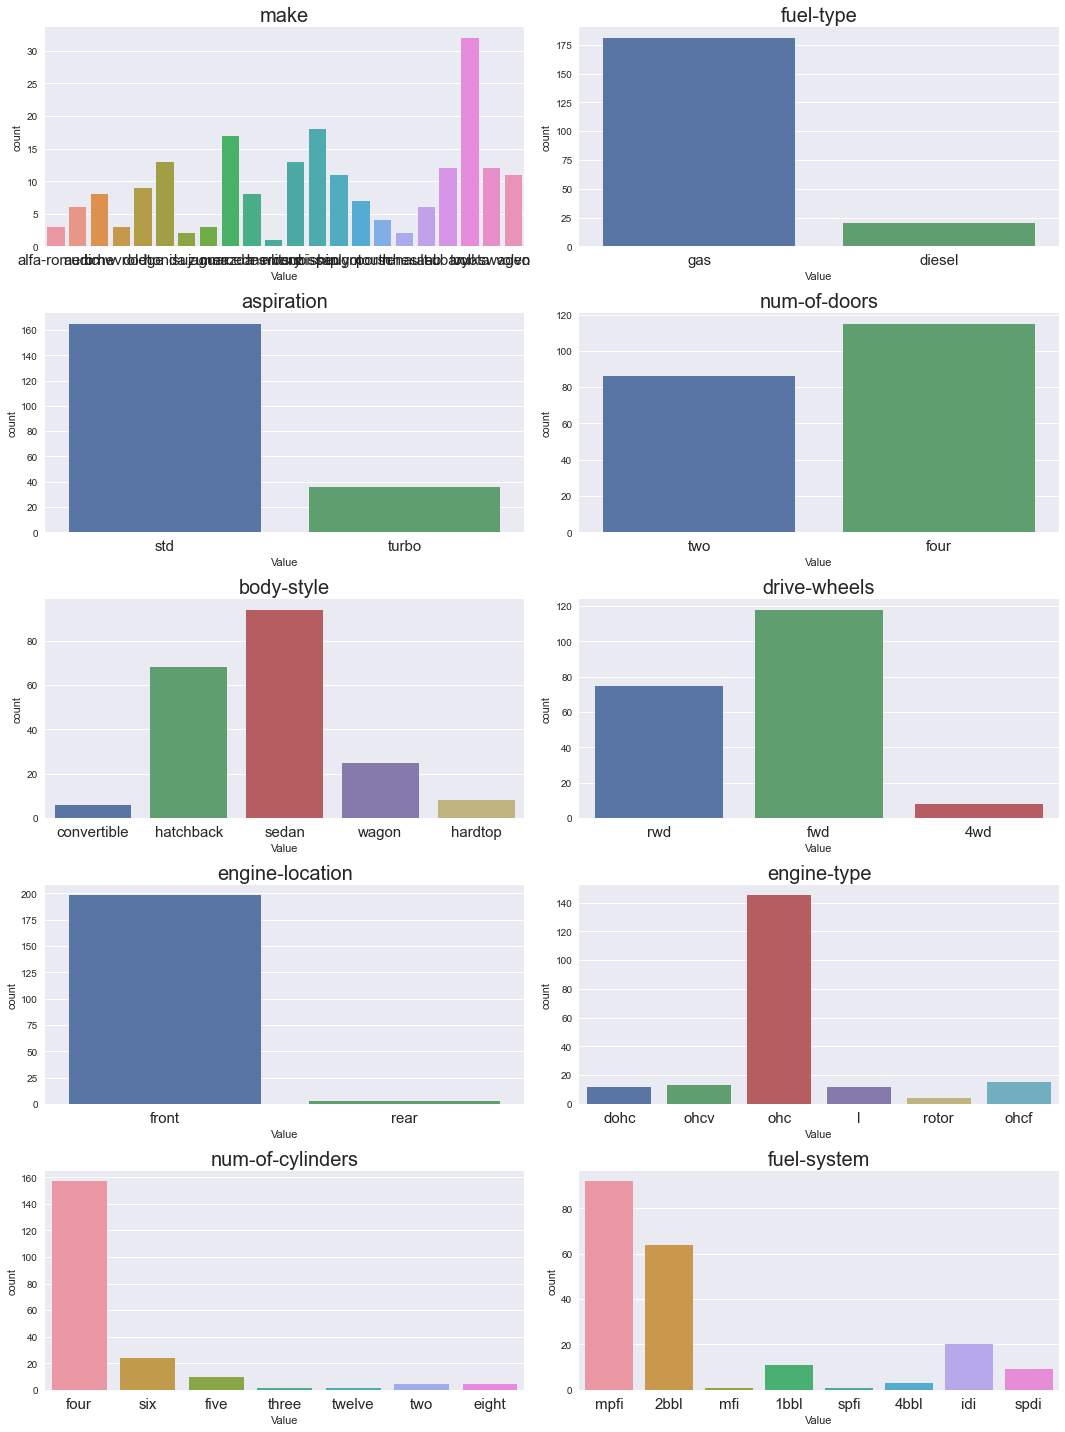

In [2160]:
# Count of each feature value
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(categorical.columns):
    plt.subplot(5, 2, i+1)
    plt.tight_layout()
    sns.countplot(categorical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.xticks(size=15)
plt.show()

### 1.2.2 Insights

- #### Total counts of car manufacturers

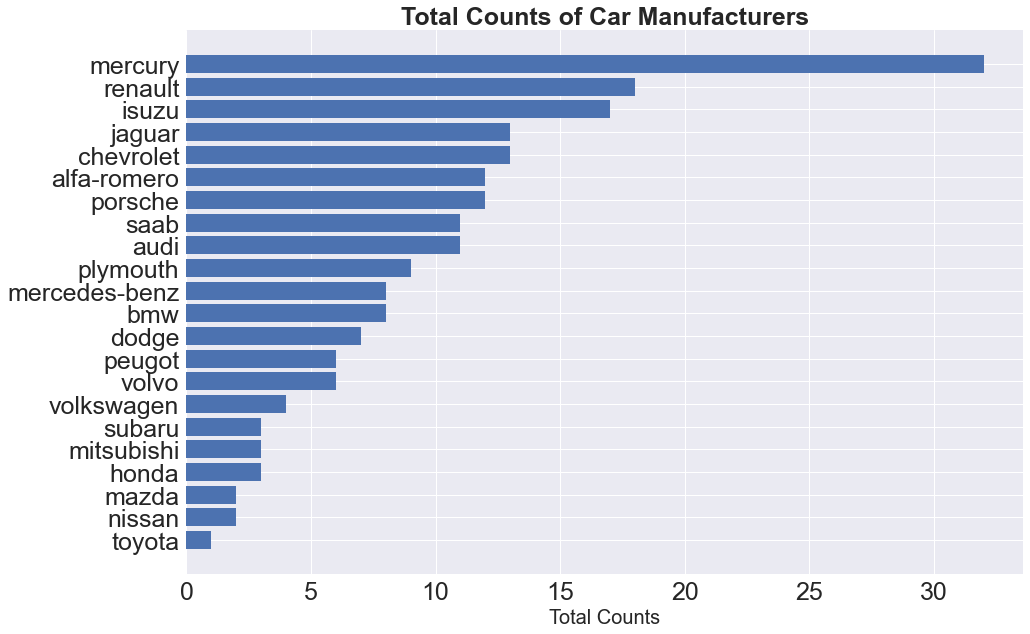

In [2161]:
# Plotting bar graph for various categorical features
f, ax = plt.subplots(figsize=(15,10))

ax.barh(df['make'].value_counts().index, df['make'].value_counts().sort_values(ascending=True))
plt.xticks(size=25)
plt.yticks(size=25)
ax.set_xlabel('Total Counts', fontsize=20)
ax.set_title('Total Counts of Car Manufacturers', weight='bold', fontsize=25)
plt.show()

- #### Top 10 car manufacturers with higher average prices

Text(0, 0.5, 'Car Brand')

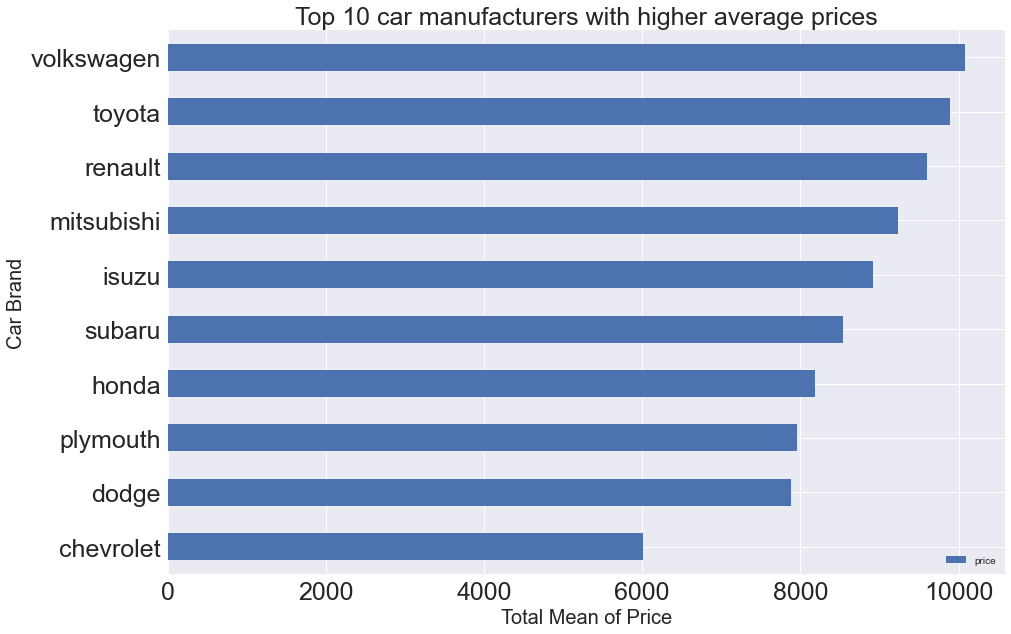

In [2162]:
# Top 10 car manufacturers with higher average prices
ax = pd.DataFrame(df.groupby(['make'])['price'].mean())
# Plot the figure.
ax = ax.sort_values(by='price', ascending=True)
ax = ax[:10]
ax = ax.plot(kind='barh',figsize=(15,10),fontsize=25)
plt.title('Top 10 car manufacturers with higher average prices',fontsize=25)
plt.xlabel('Total Mean of Price',fontsize=20)
plt.ylabel('Car Brand',fontsize=20)

- #### Top 5 engine-type with higher average prices

Text(0, 0.5, 'Engine Type')

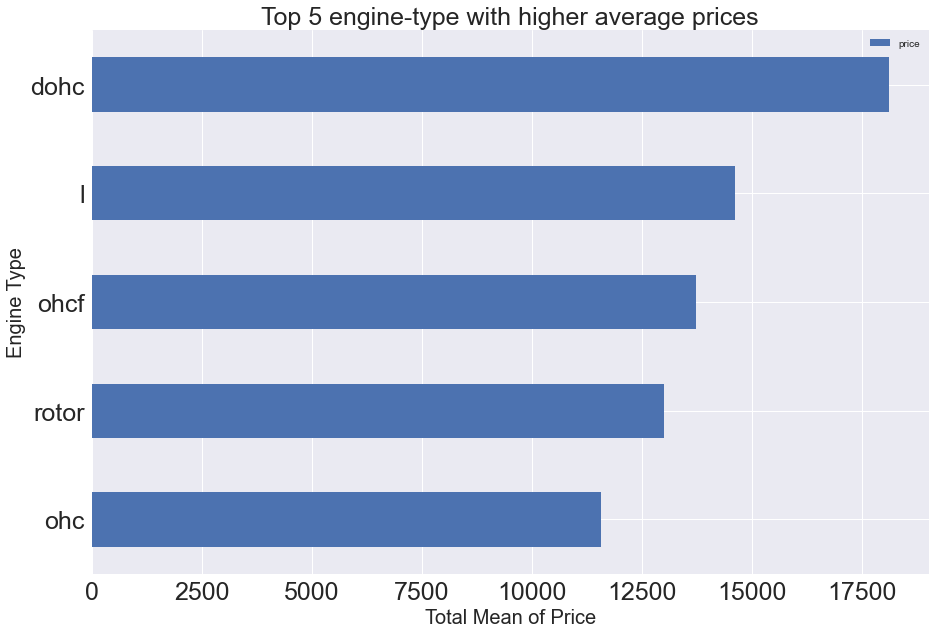

In [2163]:
# Top 5 engine-type with higher average prices
ax = pd.DataFrame(df.groupby(['engine-type'])['price'].mean())
# Plot the figure.
ax = ax.sort_values(by='price', ascending=True)
ax = ax[:5]
ax = ax.plot(kind='barh',figsize=(15,10),fontsize=25)
plt.title('Top 5 engine-type with higher average prices',fontsize=25)
plt.xlabel('Total Mean of Price',fontsize=20)
plt.ylabel('Engine Type',fontsize=20)

- #### Top 10 car manufacturers with higher average horse power

Text(0, 0.5, 'Car Brand')

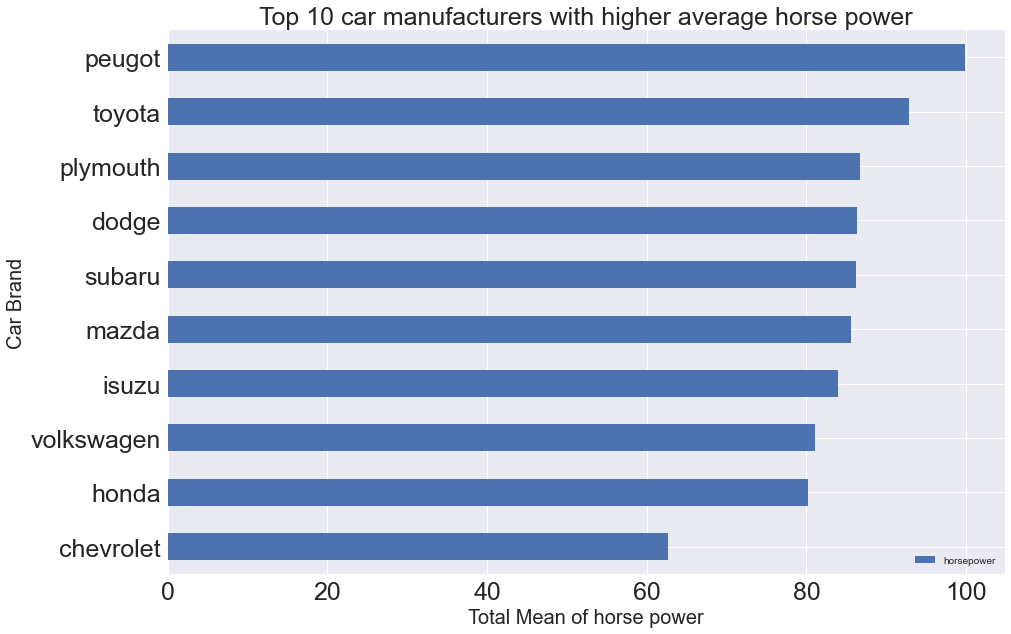

In [2164]:
# Top 10 car manufacturers with higher average horse power
ax = pd.DataFrame(df.groupby(['make'])['horsepower'].mean())
# Plot the figure.
ax = ax.sort_values(by='horsepower', ascending=True)
ax = ax[:10]
ax = ax.plot(kind='barh',figsize=(15,10),fontsize=25)
plt.title('Top 10 car manufacturers with higher average horse power',fontsize=25)
plt.xlabel('Total Mean of horse power',fontsize=20)
plt.ylabel('Car Brand',fontsize=20)

- #### Top 10 car manufacturers with high maximum peak-rpm

Text(0, 0.5, 'Car Brand')

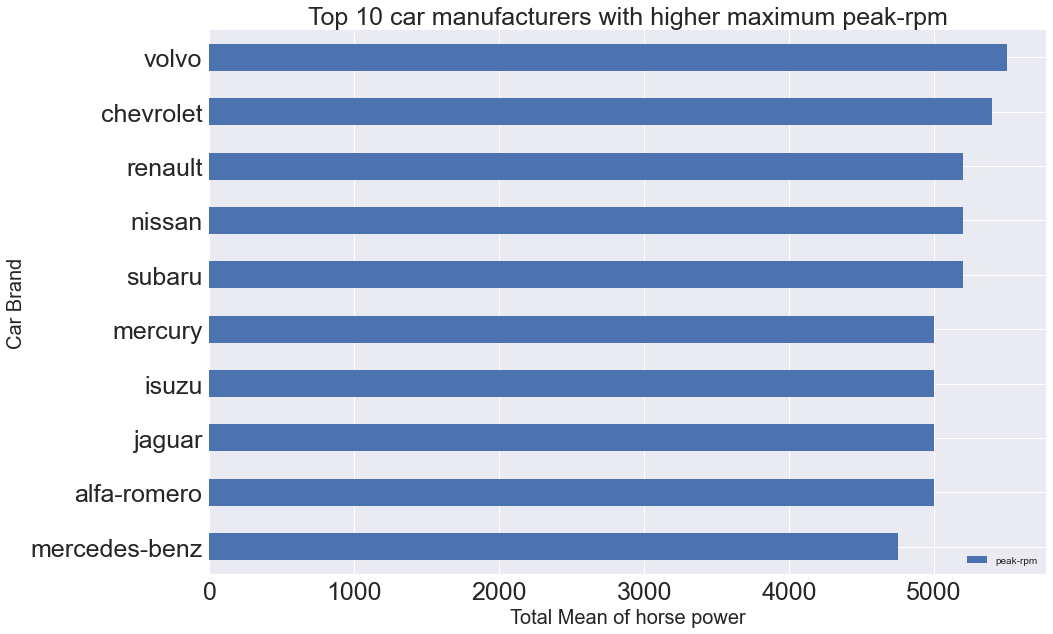

In [2165]:
# Top 10 car manufacturers with higher maximum peak-rpm
ax = pd.DataFrame(df.groupby(['make'])['peak-rpm'].max())
# Plot the figure.
ax = ax.sort_values(by='peak-rpm', ascending=True)
ax = ax[:10]
ax = ax.plot(kind='barh',figsize=(15,10),fontsize=25)
plt.title('Top 10 car manufacturers with higher maximum peak-rpm',fontsize=25)
plt.xlabel('Total Mean of horse power',fontsize=20)
plt.ylabel('Car Brand',fontsize=20)

### 1.2.2 Correlation

<AxesSubplot:>

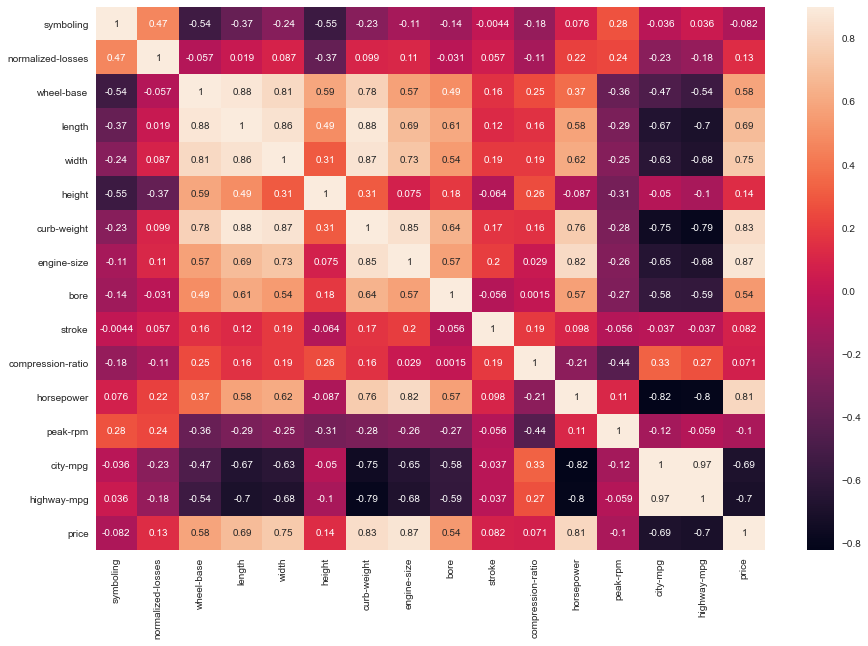

In [2166]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax=0.9, annot=True)

### 1.2.3 Apakah tipe bahan bakar mempengaruhi harga?

#### ANOVA hypothesis test

To determine if 'fuel-type' is affect the 'price', we have to know wether these variables or features are correlated. Therefore, to solve this problem we can apply ANOVA hypothesis testing.

- #### H0: The variables are not correlated with each other
- #### H1: The variables are correlated with each other
- #### Accept Null hypothesis if P-value > 0.05. Means variables are NOT correlated
- #### Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [2167]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

In [2168]:
# Running the one-way anova test between price and fuel-type
# Assumption(H0) is that fuel-type and price are NOT correlated
# Finds out the prices data for each fuel-type as a list
fuel_price = df.groupby('fuel-type')['price'].apply(list)

In [2169]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*fuel_price)
if AnovaResults[1] > 0.05:
    print('Accept Null Hypothesis as variables are not correlated where P-Value is', AnovaResults[1], 'which greater than 0.05')
elif AnovaResults[1] < 0.05:
    print('Reject Null Hypothesis as variables are correlated where P-Value is', AnovaResults[1], 'which less than 0.05')

Accept Null Hypothesis as variables are not correlated where P-Value is 0.11896254438091516 which greater than 0.05


#### So does the 'fuel-type' affect 'price'? 

Answer: No, because they are not correlated to each other based on ANOVA hypothesis testing as it Accept the Null Hypothesis (H0) with P-Value > 0.05.

# 2. Data Preparation

## 2.1 Handle Outliers

### 2.1.1 Check Outliers

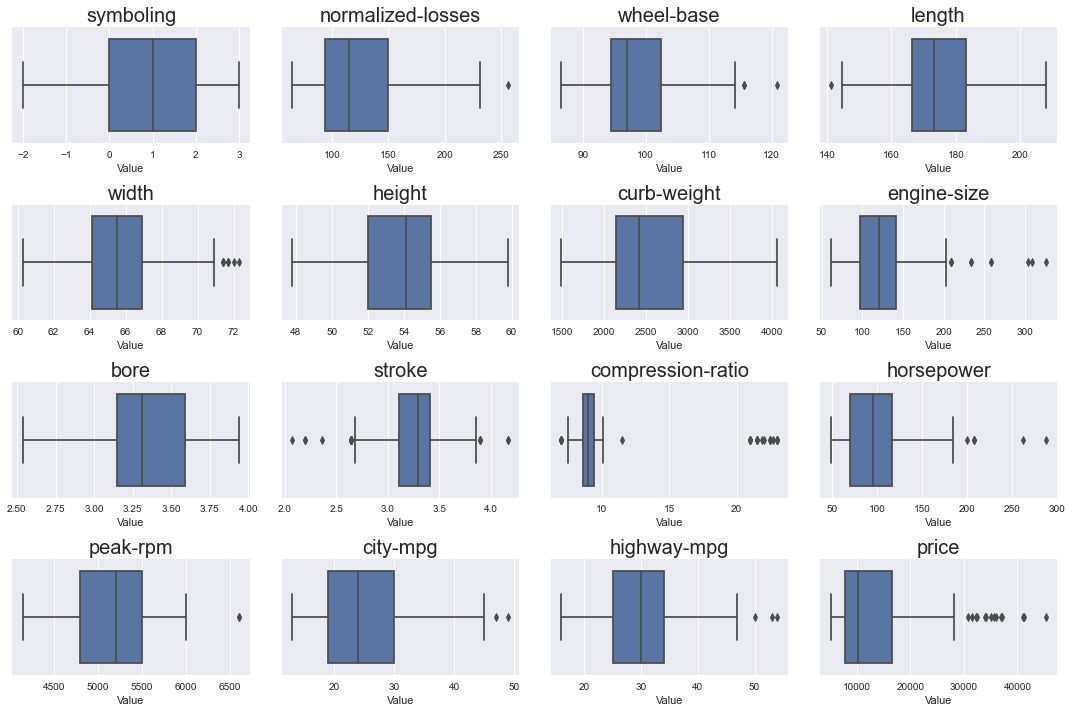

In [2170]:
# Before handling outliers
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.boxplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
plt.show()

In [2171]:
def check_score(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR 
    print("Score of feature",column ,"for lower range:", lower_range)
    print("Score of feature",column ,"for upper range:", upper_range)

In [2172]:
# Use the custome function to check the score of lower and upper range
for col in numerical.columns:
  check_score(numerical, col)

Score of feature symboling for lower range: -3.0
Score of feature symboling for upper range: 5.0
Score of feature normalized-losses for lower range: 10.0
Score of feature normalized-losses for upper range: 234.0
Score of feature wheel-base for lower range: 82.64999999999999
Score of feature wheel-base for upper range: 114.25000000000001
Score of feature length for lower range: 141.10000000000002
Score of feature length for upper range: 208.29999999999995
Score of feature width for lower range: 59.89999999999998
Score of feature width for upper range: 71.10000000000002
Score of feature height for lower range: 46.75
Score of feature height for upper range: 60.75
Score of feature curb-weight for lower range: 960.0
Score of feature curb-weight for upper range: 4120.0
Score of feature engine-size for lower range: 31.0
Score of feature engine-size for upper range: 207.0
Score of feature bore for lower range: 2.49
Score of feature bore for upper range: 4.25
Score of feature stroke for lower r

### 2.1.2 Impute outliers

In [2173]:
# Define function to handle outliers
# If there are outliers greater than upper bond, those outliers will be replace by upper bond value
# If there are outliers less than lower bond, those outliers will be replace by lower bond value
def outlier_handling(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bond = Q1 - 1.5*IQR
    upper_bond = Q3 + 1.5*IQR 
    data.loc[numerical[column]>upper_bond, column] = upper_bond
    data.loc[numerical[column]<lower_bond, column] = lower_bond

In [2174]:
# Use the custome function to handle outliers
for col in numerical.columns:
  outlier_handling(numerical, col)

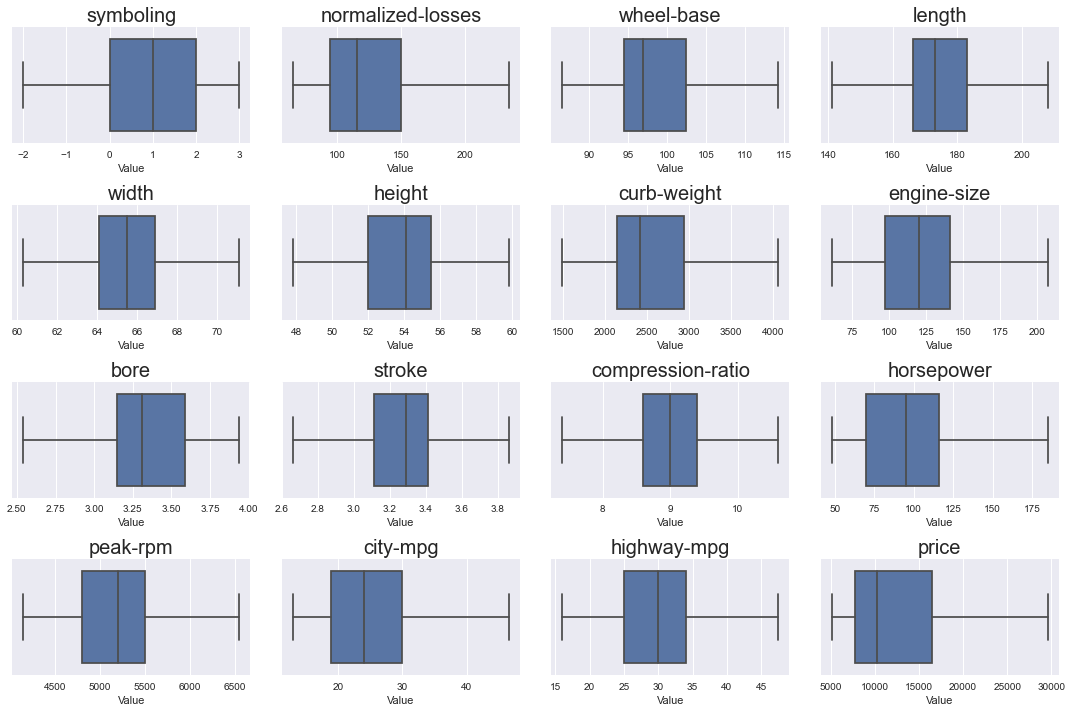

In [2175]:
# Before handling outliers
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.boxplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
plt.show()

## 2.2 Encode Data

### These categorical data need to be encode in order to be readable by the machine to train the model. There are various types of encoding to be apply such as label and one-hot encoding.

In [2176]:
# Categorical data that need to be encode
categorical.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

### 2.2.1 Label Encoding

reference: https://hersanyagci.medium.com/label-encoding-vs-one-hot-encoding-e8a10916da5b

#### There are some features that should be apply label encoding, because their value only have 2 values. If we apply one-hot encoding, it will be redundant since it generates two column for 0 and 1 while the machine only need to know if it is 0 or 1 to know the value, therefore it should be avoid to train the model.

- #### Apply label encoding on: 'fuel-type','aspiration','num-of-doors','engine-location', because these features has only 2 values.

In [2177]:
from sklearn.preprocessing import LabelEncoder

In [2178]:
labelencoder = LabelEncoder()

In [2179]:
two_value_cat = categorical[['fuel-type','aspiration','num-of-doors','engine-location']]

for x in two_value_cat.columns:
    df[x] = labelencoder.fit_transform(df[x])

In [2180]:
df[['fuel-type','aspiration','num-of-doors','engine-location']].head()

,fuel-type,aspiration,num-of-doors,engine-location
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0


### 2.2.2 one-hot Encoding

#### For the rest of the data beside ordinal will be consider as nominal where the value has no order/rank. All of the ordinal features will be encode with one-hot encoding.

In [2181]:
nominal_data = categorical[categorical.columns.difference(['fuel-type','aspiration','num-of-doors','engine-location'])]

In [2182]:
nominal_data.columns

Index(['body-style', 'drive-wheels', 'engine-type', 'fuel-system', 'make',
       'num-of-cylinders'],
      dtype='object')

In [2183]:
# Perform one-hot encodign for the nominal data features
df = pd.get_dummies(df, columns=nominal_data.columns)

In [2184]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_

## 2.3 Train Test Split

In [2185]:
# import train test split
from sklearn.model_selection import train_test_split

In [2186]:
# Drop these features because they gave low correlation score with 'price' feature.
df.drop(['compression-ratio', 'stroke'],axis=1, inplace=True)

In [2187]:
# Set target and data label
x = df.drop('price', axis=1)
y = df['price']

In [2188]:
# Separate data train and data test, split data train with 80% and data test with 20%  of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### 2.3.1 Scaling

Note : Lakukan scaling hanya pada data training

In [2189]:
from sklearn.preprocessing import MinMaxScaler

In [2190]:
scaler_minmax = MinMaxScaler()

In [2191]:
numerical = df
numerical_no_price = numerical[numerical.columns.difference(['price','compression-ratio'])]

In [2192]:
numerical_no_price.columns

Index(['aspiration', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'bore',
       'city-mpg', 'curb-weight', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location', 'engine-size',
       'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'fuel-type', 'height',
       'highway-mpg', 'horsepower', 'length', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make

In [2193]:
for i in numerical_no_price.columns:
    X_train[i] = scaler_minmax.fit_transform(np.array(X_train[i]).reshape(-1, 1))
    X_test[i] = scaler_minmax.transform(np.array(X_test[i]).reshape(-1, 1))

In [2194]:
X_train.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,horsepower,peak-rpm,city-mpg,highway-mpg,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
69,0.4,0.146597,0.0,1.0,1.0,0.0,0.586006,0.692537,0.854701,0.591667,0.815191,0.460377,0.803571,0.350467,0.081633,0.250000,0.236842,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,0.6,0.434555,1.0,1.0,0.0,0.0,0.206997,0.241791,0.299145,0.233333,0.285540,0.139623,0.312500,0.252336,0.551020,0.305556,0.368421,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.4,0.502618,0.0,1.0,0.0,0.0,0.620991,0.680597,0.692308,0.741667,0.716491,0.343396,0.910714,0.219626,0.000000,0.416667,0.447368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
172,0.8,0.361257,1.0,0.0,1.0,0.0,0.344023,0.523881,0.452991,0.433333,0.603981,0.320755,0.839286,0.317757,0.265306,0.305556,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
66,0.4,0.298429,0.0,0.0,0.0,0.0,0.533528,0.505970,0.495726,0.550000,0.492283,0.275472,0.669643,0.112150,0.020408,0.500000,0.605263,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2195]:
y_train[:5]

69     28176.0
27      8558.0
116    17950.0
172    17669.0
66     18344.0
Name: price, dtype: float64

# 3. Modeling & Evaluation

## 3.1 Modeling baseline models

In [2196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2197]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

In [2198]:
# Train the model
models = [dt, rf, xgb]

for model in models:
    model.fit(X_train, y_train)

In [2199]:
# Predict using trained models
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

## 3.2 Evaluation

In [2200]:
pd.DataFrame({'true': y_test, 'predict':y_pred_kn}).head(10)

,true,predict
19,6295.0,5899.0
174,10698.0,10348.6
110,13860.0,20355.6
101,13499.0,16417.0
181,15750.0,16897.2
186,8495.0,9370.2
5,15250.0,11152.4
150,5348.0,6972.2
13,21105.0,17794.4
156,6938.0,7778.0


In [2201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print('---Decision Tree---')
print('MAE :', mean_absolute_error(y_test, y_pred_dt))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print('r2 score :',r2_score(y_test, y_pred_dt))
print()
print('---Random Forest---')
print('MAE :', mean_absolute_error(y_test, y_pred_rf))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('r2 score :',r2_score(y_test, y_pred_rf))
print()
print('---XGBRegressor---')
print('MAE :', mean_absolute_error(y_test, y_pred_xgb))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('r2 score :',r2_score(y_test, y_pred_xgb))

---Decision Tree---
MAE : 1800.341463414634
RMSE : 2589.929013058645
r2 score : 0.9114727932523103

---Random Forest---
MAE : 1585.8127439024386
RMSE : 2276.604149958385
r2 score : 0.931596852427434

---XGBRegressor---
MAE : 1596.4350109565548
RMSE : 2436.6684672176334
r2 score : 0.9216400904166093


#### From the result, RandoForestRegressor model perfom better compare to the other model in term of accuracy based on MAE score, we can improve this model to get better result by tuning the parameter.

# 4. Tuning

In [2202]:
#import gridsearch
from sklearn.model_selection import GridSearchCV

In [2203]:
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [8,9,10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [1,2,3],
 'n_estimators': [400,450,500]
}

In [2204]:
%%time
clf = GridSearchCV(RandomForestRegressor(random_state=0),param_grid, cv=5,n_jobs = -1, return_train_score=False, scoring='neg_mean_absolute_error')

clf.fit(X_train, y_train)

clf.cv_results_

Wall time: 13min 48s


{'mean_fit_time': array([0.6178205 , 0.78431706, 0.62681346, 2.16067119, 2.64916992,
        3.19763203, 2.70933108, 3.04932418, 3.25819421, 0.65579786,
        0.85986795, 0.49789352, 2.86243849, 2.79308195, 3.09569502,
        2.18085685, 3.00095186, 3.29137373, 0.9344255 , 0.46391373,
        0.65080042, 2.7191256 , 2.91560631, 3.02993593, 1.98917613,
        2.90401073, 3.34853883, 0.97400041, 0.47530704, 1.11491599,
        2.04334011, 2.37953601, 2.59780049, 2.1406817 , 2.44869285,
        2.47927523, 0.49809184, 0.79091563, 1.30619411, 1.52805996,
        2.61578889, 2.48347216, 1.8616518 , 2.48846898, 2.55202923,
        0.43113441, 1.19626446, 0.85786991, 1.92281804, 2.22522812,
        2.72612252, 1.59441805, 2.55722561, 2.62898173, 0.46771293,
        1.27421517, 0.60082884, 2.9979558 , 3.21602035, 3.70671849,
        2.86783628, 3.01714292, 3.43888259, 0.42913527, 1.19786272,
        0.56285295, 2.72692256, 2.8078723 , 3.19463468, 2.33896003,
        3.0779037 , 3.44388056,

In [2209]:
rf_grid = pd.DataFrame(clf.cv_results_)
rf_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.617821,0.059567,0.000000,0.000000,True,8,auto,1,1,400,"{'bootstrap': True, 'max_depth': 8, 'max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,324
1,0.784317,0.005910,0.000000,0.000000,True,8,auto,1,1,450,"{'bootstrap': True, 'max_depth': 8, 'max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,239
2,0.626813,0.132535,0.000000,0.000000,True,8,auto,1,1,500,"{'bootstrap': True, 'max_depth': 8, 'max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,240
3,2.160671,0.129058,0.140313,0.036488,True,8,auto,1,2,400,"{'bootstrap': True, 'max_depth': 8, 'max_featu...",-1530.838300,-1345.622447,-1834.494332,-1687.962009,-1067.156135,-1493.214645,268.001198,28
4,2.649170,0.284217,0.213069,0.107108,True,8,auto,1,2,450,"{'bootstrap': True, 'max_depth': 8, 'max_featu...",-1518.687331,-1338.367383,-1842.805062,-1684.938018,-1078.429062,-1492.645371,266.699570,26


In [2206]:
rf_grid[['param_n_estimators','param_max_features','param_max_depth','param_min_samples_leaf','param_min_samples_split','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

,param_n_estimators,param_max_features,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
193,450,sqrt,8,1,2,-1473.200879
192,400,sqrt,8,1,2,-1474.636644
194,500,sqrt,8,1,2,-1476.361868
58,450,auto,9,1,2,-1477.329296
57,400,auto,9,1,2,-1480.674107


In [2207]:
print("Best params for RandomForestRegressor model:",clf.best_params_)

Best params for RandomForestRegressor model: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}


In [2208]:
print("Best score of MAE for RandomForestRegressor: ",abs(clf.best_score_))

Best score of MAE for RandomForestRegressor:  1473.2008790759614


#### From the result, GridSearchCV allow us to find the best parameters to get the best score for MAE but also prevent the model to be overfit with training data.

# 5. Final Model

In [2210]:
final_model = RandomForestRegressor(bootstrap= False, max_depth= 8, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 450,random_state=0)

In [2212]:
final_model.fit(x, y)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      n_estimators=450, random_state=0)

# 10. Feature Importance

In [2250]:
# get importance
importance = model.feature_importances_

In [2256]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'ma

In [2257]:
kolom = list(df.columns)
del kolom[17] # delete 'price' column

In [2258]:
df_imp = pd.DataFrame({'columns' : kolom,
                      'Importance' : importance})

In [2259]:
df_imp[['columns','Importance']].sort_values(by='Importance', ascending=False).head(10)

,columns,Importance
11,engine-size,0.628593
24,drive-wheels_rwd,0.131118
63,num-of-cylinders_four,0.042751
6,wheel-base,0.028256
7,length,0.023850
23,drive-wheels_fwd,0.021888
10,curb-weight,0.019076
41,make_bmw,0.016683
25,engine-type_dohc,0.015973
13,horsepower,0.014014


In [2260]:
def mutlak(x):
    if x['Importance'] <0:
        return x['Importance']*-1
    else:
        return x['Importance']
df_imp['Value'] = df_imp.apply(lambda x: mutlak(x), axis=1)

<AxesSubplot:ylabel='columns'>

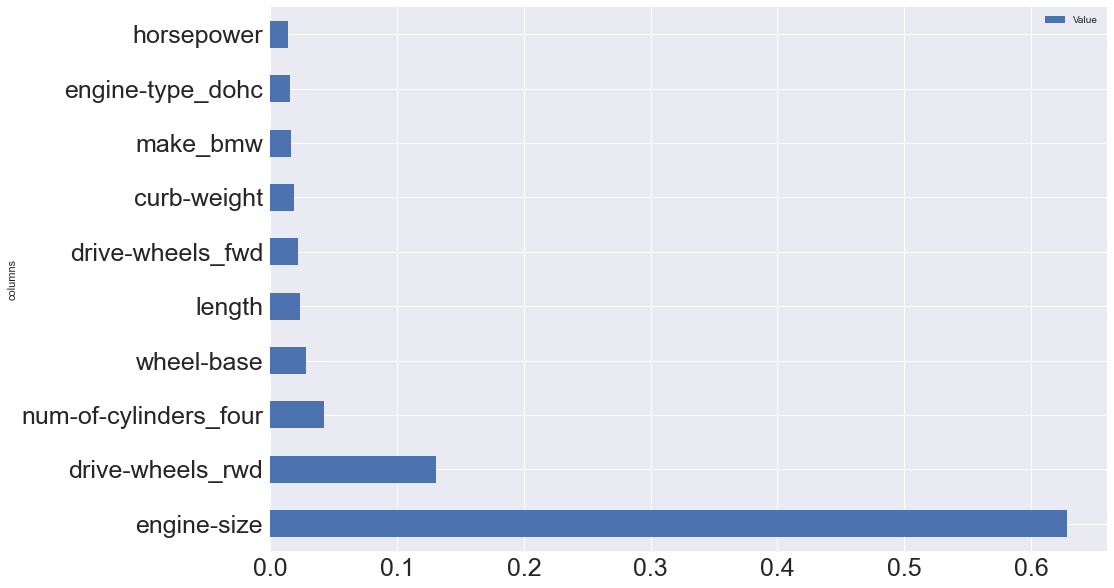

In [2261]:
# Top 10 Features importance for training the model
df_imp[['columns','Value']].sort_values(by='Value', ascending=False).head(10).set_index('columns').plot(kind='barh',figsize=(15,10),fontsize=25)

#### From the result, it shows us that feature 'engine-size' is the most important feature for training of the model.